# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

Also plot the number of foxes versus the number of rabbits.

Then try also with 
* $k_3 = 0.00004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* $t_{final} = 800$ days

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


# Solving ODEs

*Much of the following content reused under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY. https://github.com/numerical-mooc/numerical-mooc*

Let's step back for a moment. Suppose we have a first-order ODE $u'=f(u)$. You know that if we were to integrate this, there would be an arbitrary constant of integration. To find its value, we do need to know one point on the curve $(t, u)$. When the derivative in the ODE is with respect to time, we call that point the _initial value_ and write something like this:

$$u(t=0)=u_0$$

In the case of a second-order ODE, we already saw how to write it as a system of first-order ODEs, and we would need an initial value for each equation: two conditions are needed to determine our constants of integration. The same applies for higher-order ODEs: if it is of order $n$, we can write it as $n$ first-order equations, and we need $n$ known values. If we have that data, we call the problem an _initial value problem_.

Remember the definition of a derivative? The derivative represents the slope of the tangent at a point of the curve $u=u(t)$, and the definition of the derivative $u'$ for a function is:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. We can write:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

With this equation, and because we know $u'(t)=f(u)$, if we have an initial value, we can step by $\Delta t$ and find the value of $u(t+\Delta t)$, then we can take this value, and find $u(t+2\Delta t)$, and so on: we say that we _step in time_, numerically finding the solution $u(t)$ for a range of values: $t_1, t_2, t_3 \cdots$, each separated by $\Delta t$. The numerical solution of the ODE is simply the table of values $t_i, u_i$ that results from this process.


# Euler's method
*Also known as "Simple Euler" or sometimes "Simple Error".*

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula, based on Equation (10):

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

For the equations of the rabbits and foxes, Euler's method gives the following algorithm that we need to implement in code:

\begin{align}
R_{n+1} & = R_n + \Delta t \left(k_1 R_n - k_2 R_n F_n \right) \\
F_{n+1} & = F_n + \Delta t \left( k_3 R_n F_n - k_4 F_n \right).
\end{align}


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#accompanying Euler's method code attributed to Prof. West - thank you!
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
end_time = 600.
step_size = 1.
times = np.arange(0, end_time, step_size)
rabbits = np.zeros_like(times)
foxes = np.zeros_like(times)
rabbits[0] = 400.
foxes[0] = 200.
for n in range(len(times)-1):
    delta_t = times[n+1] - times[n]
    rabbits[n+1] = rabbits[n] + delta_t * (k1 * rabbits[n] - k2 * rabbits[n] * foxes[n])
    foxes[n+1] = foxes[n] + delta_t * (k3 * rabbits[n] * foxes[n] - k4 * foxes[n])

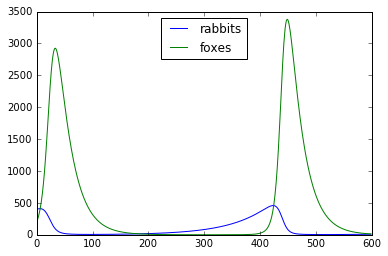

In [3]:
plt.plot(times, rabbits, label='rabbits')
plt.plot(times, foxes, label='foxes')
plt.legend(loc="best") # put the legend at the best location to avoid overlapping things
plt.show()

In [4]:
#choosing different step sizes
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
def solve_by_euler(step_size = 1.):
    """
    Evaluate by simple Euler, with the given step size.
    
    Returns the peak number of foxes.
    """
    end_time = 600.
    times = np.arange(0, end_time, step_size)
    rabbits = np.zeros_like(times)
    foxes = np.zeros_like(times)
    rabbits[0] = 400
    foxes[0] = 200
    for n in range(len(times)-1):
        delta_t = times[n+1] - times[n]
        rabbits[n+1] = rabbits[n] + delta_t * (k1 * rabbits[n] - k2 * rabbits[n] * foxes[n])
        foxes[n+1] = foxes[n] + delta_t * (k3 * rabbits[n] * foxes[n] - k4 * foxes[n])
    return foxes.max()

step_sizes = []
maximums = []
for i in range(20):
    print(i)
    step_size = 10**(1-i/5)
    print("step size",step_size)
    maximum = solve_by_euler(step_size)
    print("max foxes",maximum)
    step_sizes.append(step_size)
    maximums.append(maximum)

0
step size 10.0
max foxes 9998.78475782
1
step size 6.309573444801933
max foxes 3757.41265232
2
step size 3.9810717055349722
max foxes 6831.75851318
3
step size 2.51188643150958
max foxes 4686.90809525
4
step size 1.5848931924611134
max foxes 3801.65788402
5
step size 1.0
max foxes 3379.27631701
6
step size 0.6309573444801934
max foxes 3146.04098438
7
step size 0.3981071705534973
max foxes 3012.6379837
8
step size 0.25118864315095796
max foxes 2932.87919521
9
step size 0.15848931924611134
max foxes 2884.18652591
10
step size 0.1
max foxes 2854.12476091
11
step size 0.0630957344480193
max foxes 2835.41436334
12
step size 0.039810717055349734
max foxes 2823.7085615
13
step size 0.025118864315095794
max foxes 2816.36116277
14
step size 0.01584893192461114
max foxes 2811.74114081
15
step size 0.01
max foxes 2808.83241288
16
step size 0.00630957344480193
max foxes 2806.99952212
17
step size 0.003981071705534973
max foxes 2805.84398119
18
step size 0.0025118864315095794
max foxes 2805.11527

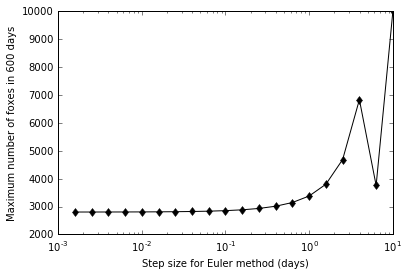

In [5]:
plt.semilogx(step_sizes, maximums, 'kd-')
plt.ylabel("Maximum number of foxes in 600 days")
plt.xlabel("Step size for Euler method (days)")
plt.show()

In [6]:
maximums = np.array(maximums)
errors = maximums - maximums[-1] # calculate error relative to the last value

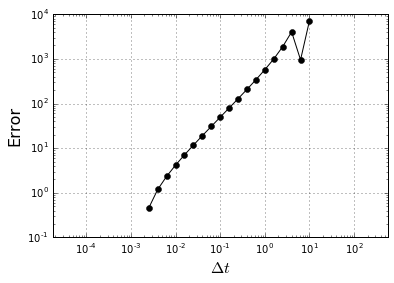

In [7]:
# plot all but the last point, because log(0.0) will cause problems scaling the axes
plt.loglog(step_sizes[:-1], errors[:-1], 'ko-')

plt.axis('equal') # scale the axes to make a square a square
plt.grid(True) # turn on the grid lines
plt.xlabel("$\Delta t$", fontsize=16)
plt.ylabel("Error", fontsize=16)
plt.show()

The straight line slope of 1 shows that Simple Euler is a first order algorithm. 
We only get below an error of $10^0$ (1.0) in this quantity of interest with the second smallest step size, $\sim$0.002.
The Euler method is not very good - it requires tiny steps and converges slowly. You might have heard of (and might like to try) some [Ruge-Kutta](https://en.wikipedia.org/wiki/Runge–Kutta_methods) methods. If you do, first set up the right hand side of the ODE as a function, because you'll need to call it repeatedly within a single iteration.

# ODEInt Method

In [8]:
#using ODEint to perform integration methods on ordinary differential equations
from scipy.integrate import odeint

times = np.linspace(0.,600, 600)
RandF = [400.,200.]

def solve_by_ODE(RandF,t,k1,k2,k3,k4):
    R, F = RandF
    dRdt = k1*R - k2*R*F
    dFdt = k3*R*F - k4*F
    return [dRdt, dFdt]


In [9]:
solution = odeint(solve_by_ODE, RandF, times, args=(k1,k2,k3,k4))
rabbitsODE = solution[:,0]
foxesODE = solution[:,1]

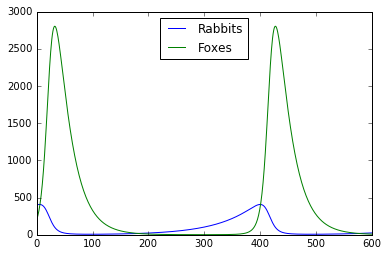

In [10]:
plt.plot(times, rabbitsODE, label='Rabbits')
plt.plot(times, foxesODE, label='Foxes')
plt.legend(loc='best')
plt.show()


In [11]:
from scipy.signal import argrelextrema
peaks = argrelextrema(solution,np.greater, order=20)
print(peaks[0])

[  5  32 400 427]


In [12]:
fox1 = round(solution[peaks[0][1],1],0)
fox2 = round(solution[peaks[0][3],1],0)
time1 = round(times[peaks[0][1]],2)
time2 = round(times[peaks[0][3]],2)


In [13]:
print("The foxes first peak at", fox1, "foxes at", time1, "days")
print("The foxes peak secondarily at", fox2, "foxes at", time2, "days")

The foxes first peak at 2803.0 foxes at 32.05 days
The foxes peak secondarily at 2804.0 foxes at 427.71 days


# KMC Method

In [14]:
solution_KMC = np.zeros((3,3))
print(solution_KMC)
solution = np.append(solution_KMC,[[5,5,5]],axis=0)
print(solution)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 5.  5.  5.]]


In [15]:
import random

R_0 = 400.
F_0 = 200.
end = 600. #days

def solve_by_KMC(R_0,F_0, end):
    R = R_0
    F = F_0
    time = 0
    solution_KMC = np.zeros((1,3))
    solution_KMC[0] = 0, R_0, F_0
    while time < end:
        Rb = k1*R
        Rd = k2*R*F
        Fb = k3*R*F
        Fd = k4*F
        Rcum = Rb + Rd + Fb + Fd
        u = random.uniform(0,1)
        if Rb > u * Rcum:
            R = R + 1
        elif Rd + Rb > u * Rcum >= Rb:
            R = R - 1
        elif Fb + Rd + Rb > u * Rcum >= Rd + Rb:
            F = F + 1
        else:
            F = F - 1
        
        u = random.uniform(0,1)
        delta_t = 1/Rcum * np.log(1/u)
        time_new = time + delta_t
        solution_KMC = np.append(solution_KMC,[[time_new,R,F]],axis=0)
        
        if F==0:
            break
        time = time_new
    return solution_KMC

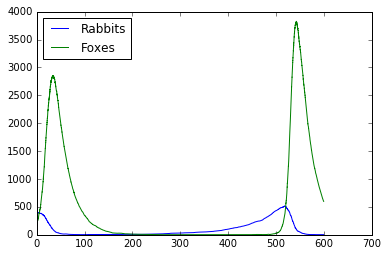

In [16]:
solution = solve_by_KMC(R_0,F_0,end)
timeKMC = solution[:,0]
R_KMC = solution[:,1]
F_KMC = solution[:,2]

plt.plot(timeKMC, R_KMC, label='Rabbits')
plt.plot(timeKMC, F_KMC, label='Foxes')
#plt.xlim(17.8,18)
#plt.ylim(310,320)
plt.legend(loc='best')
plt.show()

In [37]:
#a = peak_KMC(solution)


In [53]:
'''Peak selection adopted from Greg Zaylor's notebook - thank you Greg'''
#create counter for number of times foxes/rabbits die out:
zeropopulation=0
#create list to store values at peaks for foxes and times:
foxes = [[0,0],[0,0]]
#define number of iterations
Trials = 100
def experiment(Trials):
    zeropopulation=0
    R_0 = 400.
    F_0 = 200.
    end = 600. #days
    
    for i in range(Trials):
        #run the KMC
        R = R_0
        F = F_0
        time = 0
        solution_exp = np.zeros((1,3))
        solution_exp[0] = 0, R_0, F_0
        while time < end:
            Rb = k1*R
            Rd = k2*R*F
            Fb = k3*R*F
            Fd = k4*F
            Rcum = Rb + Rd + Fb + Fd
            u = random.uniform(0,1)
            if Rb > u * Rcum:
                R = R + 1
            elif Rd + Rb > u * Rcum >= Rb:
                R = R - 1
            elif Fb + Rd + Rb > u * Rcum >= Rd + Rb:
                F = F + 1
            else:
                F = F - 1

            u = random.uniform(0,1)
            delta_t = 1/Rcum * np.log(1/u)
            time_new = time + delta_t
            solution_exp = np.append(solution_exp,[[time_new,R,F]],axis=0)

            if F==0:
                break
            time = time_new
        #plot all values on the same graph
        time_exp = solution_exp[:,0]
        R_exp = solution_exp[:,1]
        F_exp = solution_exp[:,2]

        if i<20:
            plt.plot(time_exp,R_exp,'b')
            plt.plot(time_exp,F_exp,'g-')

        filtered = F_exp * (time_exp>200) * (F_exp>200)
        c = filtered.max()
        t = time_exp[filtered.argmax()]
        print(t, c)
        #if 2nd peak exists, add number of foxes and time it occurs to storage list. only return first peak if peak repeats itself
        if c>200:
            foxes[1].append(c)
            foxes[0].append(t)
        #if 2nd peak doesn't exist, add to the counter for number of times foxes die
        else:
            zeropopulation = zeropopulation + 1
    return foxes


In [54]:
print("The average of the 2nd peak is", round(sum(foxes[1])/float((len(foxes[1])-1))), "foxes, which occurs at ", round(sum(foxes[0])/float((len(foxes[0])-1))), "days.")
print("The probability that no 2nd peak forms (and all the foxes die out before 600 days) is ",100*zeropopulation/Trials,"%")

The average of the 2nd peak is 0 foxes, which occurs at  0 days.
The probability that no 2nd peak forms (and all the foxes die out before 600 days) is  0.0 %


In [55]:
time_75, time_25 = np.percentile(foxes[0], [75 ,25])
fox_75, fox_25 = np.percentile(foxes[1], [75 ,25])
print("The IQR of foxes is", round(fox_25), "to", round(fox_75))
print("The IQR of times is", round(time_25), "to", round(time_75))

The IQR of foxes is 0.0 to 0.0
The IQR of times is 0.0 to 0.0


In [47]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


0.0 0.0
386.041068265 1419.0
395.060004073 1632.0
0.0 0.0
0.0 0.0
419.978436082 2462.0
0.0 0.0
414.876825512 2576.0
394.098640556 2878.0
357.205067588 1934.0
0.0 0.0
0.0 0.0
359.42082733 2122.0
433.283060663 3076.0
0.0 0.0
0.0 0.0
0.0 0.0
416.458838028 2045.0
359.311435351 1748.0
0.0 0.0
0.0 0.0
394.812352163 1631.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
384.39589795 1643.0
0.0 0.0
0.0 0.0
0.0 0.0
354.80532609 1928.0
0.0 0.0
0.0 0.0
0.0 0.0
383.439899092 2298.0
0.0 0.0
0.0 0.0
0.0 0.0
360.355827039 2532.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
452.522278554 2144.0
0.0 0.0
0.0 0.0
433.036582275 3729.0
392.25014505 3009.0
413.62931788 3372.0
0.0 0.0
490.090023789 2637.0
0.0 0.0
406.323005621 2884.0
0.0 0.0
0.0 0.0
417.046216566 2292.0
385.651075121 2694.0
402.464477534 2867.0
415.38417895 2157.0
0.0 0.0
440.00534352 2328.0
494.508581533 2022.0
431.895236616 2692.0
0.0 0.0
372.086957138 1950.0
0.0 0.0
434.881597569 3306.0
396.08584536 2688.0
0.0 0.0
378.62464222 1669.0
0.0 0.0
350.48376

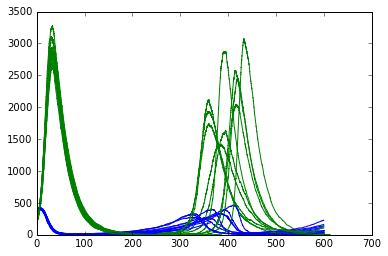

In [56]:
%lprun -f experiment experiment(100)